# 1. Install Dependencies and Setup

In [1]:
# import tensorflow as tf
# # import os

In [2]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
# !pip list

In [4]:
import tensorflow as tf
import os

In [5]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# gpus

In [6]:
# len(gpus)

In [7]:
# gpus = tf.config.experimental.list_physical_devices('CPU')
# gpus
# len(gpus)

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove Dodgy Images

In [9]:
import cv2
import imghdr

In [10]:
data_dir = 'data'

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
# # Check if we are reading the data folder which has happy and sad faces folders correctly

# os.listdir(data_dir)

In [13]:
# #check for all happy images
# os.listdir(os.path.join(data_dir,'happy'))

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [15]:
# tf.data.Dataset??

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
print(tf.__version__)

2.11.0-dev20220812


In [18]:
# !pip install tf-nightly

In [19]:
tf.keras.preprocessing.image_dataset_from_directory??

In [45]:
#Build a image dataset using Keras, which also does preprocessing, resizing images, builds labels, builds classes
#Build data pipeline

data = tf.keras.utils.image_dataset_from_directory('data')

Found 162 files belonging to 2 classes.


In [21]:
#access our data pipeline

data_iterator = data.as_numpy_iterator()

In [22]:
# data_iterator

In [33]:
#actually accessing our data pipeline

batch = data_iterator.next()

In [25]:
# batch

In [34]:
# Class 1 == Sad People
# Class 0 == Happy People
#images represented as numpy arrays

batch[1]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [29]:
#images represented as numpy arrays
# batch[0].shape

In [30]:
#labels, 1=happy, 0=sad

batch[1]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

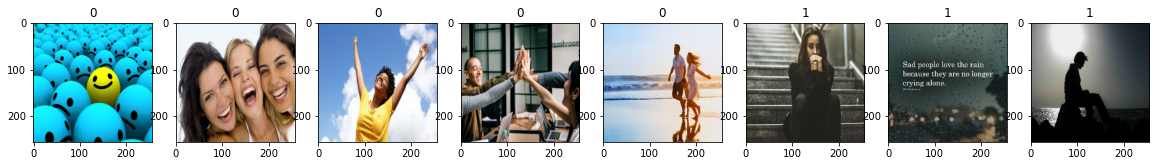

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [46]:
# x = images/independent features
# y = labels
# x to be transformed because range of x is from 0-255(images), y needs no transformation as its range is from 0-1

data = data.map(lambda x,y: (x/255, y))

In [42]:
data.as_numpy_iterator().next()

(array([[[[2.5078184e-03, 3.2124894e-03, 3.7428073e-03],
          [2.5265433e-03, 3.2032062e-03, 3.7633451e-03],
          [2.5213009e-03, 3.2287212e-03, 3.7823543e-03],
          ...,
          [3.5678586e-03, 3.6755095e-03, 3.7985391e-03],
          [3.5678586e-03, 3.6755095e-03, 3.7677817e-03],
          [3.5678586e-03, 3.6755095e-03, 3.7677817e-03]],
 
         [[2.5242607e-03, 3.2191256e-03, 3.7565269e-03],
          [2.5379327e-03, 3.2327976e-03, 3.7801533e-03],
          [2.5399032e-03, 3.2291212e-03, 3.7548202e-03],
          ...,
          [3.5678586e-03, 3.6755095e-03, 3.7985391e-03],
          [3.5678586e-03, 3.6755095e-03, 3.7677817e-03],
          [3.5678586e-03, 3.6755095e-03, 3.7677817e-03]],
 
         [[2.5360635e-03, 3.2364200e-03, 3.7525180e-03],
          [2.5528052e-03, 3.2445609e-03, 3.7524784e-03],
          [2.5643683e-03, 3.2256523e-03, 3.7637525e-03],
          ...,
          [3.5678586e-03, 3.6755095e-03, 3.7985391e-03],
          [3.5678586e-03, 3.6755095e-

In [47]:
#check whether scaling has worked perfectly

scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [48]:
batch[0].min()

0.0

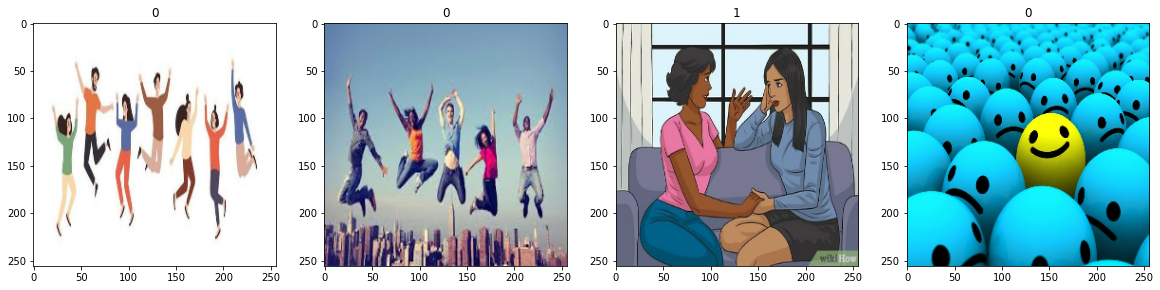

In [52]:
#visualize scaled data

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [54]:
print("The batches in our data equal = ",len(data))

The batches in our data equal =  6


In [64]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [68]:
test_size

1

In [77]:
val_size

2

In [78]:
train_size

3

In [69]:
print("Total size after dividing: ",train_size+val_size+test_size)

Total size after dividing:  6


**Tensorflow documentation for dividing datasets with methods**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [80]:
print("Train data size:",len(train))

Train data size: 3


In [81]:
print("Validation data size:",len(test))

Validation data size: 1


In [82]:
print("Test data size:",len(train))

Test data size: 3


# 6. Build our Deep Learning Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [84]:
# using the keras Sequential API  as our data source is coming from one source.  For multiple sources use Functional API 

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for Conv2D convulutional network

#MaxPooling2D acts like a condensing layer for condensing our data

#dropout is for regularization

In [85]:
model = Sequential()

In [86]:
# MaxPooling2D??

In [88]:
#first convolutional layer with 16 filters, filter size = 3 pixels x 3 pixels in size with a stride of 1 meaning it will
# move 1 pixel at a time
#the activation function is relu
#input shape will be 256 WIDE x 256 LONG with 3 channels RGB

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #this layer will take max value after passing relu activation and return back that value

model.add(Conv2D(32, (3,3), 1, activation='relu')) #another set of layers with 32 filters
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #flattening the data

model.add(Dense(256, activation='relu')) #fully connected dense layer with relu activation with 256 neurons
model.add(Dense(1, activation='sigmoid'))  #fully connected dense layer with single output with sigmoid activation
                                            #this output will represent as 0 or 1

In [89]:
#compile the model
#optimizer is 'adam'
#metric is going to be 'accuracy' to show how well our model classifies our classes as happy or sad

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [90]:
#to see how well our model transforms our data

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [91]:
logdir = 'logs'

In [92]:
#get details about our models performance, looking back at it, we can find out if we need to add or reduce layers

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

**Fit our Model**

In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 10s 3s/step - loss: 2.0605 - accuracy: 0.4688 - val_loss: 0.6677 - val_accuracy: 0.6406
Epoch 2/20
3/3 [==============================] - 8s 3s/step - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6549 - val_accuracy: 0.7812
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.6593 - accuracy: 0.6042 - val_loss: 0.5953 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.6206 - accuracy: 0.6667 - val_loss: 0.6053 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 8s 2s/step - loss: 0.5908 - accuracy: 0.7188 - val_loss: 0.5670 - val_accuracy: 0.7031
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.6158 - accuracy: 0.6458 - val_loss: 0.5809 - val_accuracy: 0.8281
Epoch 7/20
3/3 [==============================] - 8s 2s/step - loss: 0.5917 - accuracy: 0.7396 - val_loss: 0.5765 - val_accuracy: 0.6562
Epoch 8/20
3/3 [========================

In [94]:
hist.history

{'loss': [2.0604686737060547,
  0.7012806534767151,
  0.6592623591423035,
  0.6206226348876953,
  0.5908389091491699,
  0.6158323884010315,
  0.5916540622711182,
  0.5491829514503479,
  0.5436589121818542,
  0.5386813879013062,
  0.4564328193664551,
  0.38623395562171936,
  0.3871670067310333,
  0.30911800265312195,
  0.26502522826194763,
  0.2090722769498825,
  0.1471034437417984,
  0.19598416984081268,
  0.14932973682880402,
  0.10697609186172485],
 'accuracy': [0.46875,
  0.5,
  0.6041666865348816,
  0.6666666865348816,
  0.71875,
  0.6458333134651184,
  0.7395833134651184,
  0.7083333134651184,
  0.78125,
  0.6979166865348816,
  0.7604166865348816,
  0.90625,
  0.8333333134651184,
  0.8645833134651184,
  0.8958333134651184,
  0.9270833134651184,
  0.96875,
  0.90625,
  0.9791666865348816,
  0.96875],
 'val_loss': [0.6677353978157043,
  0.6549081802368164,
  0.595289945602417,
  0.6053153276443481,
  0.5670400261878967,
  0.5808728933334351,
  0.5764752626419067,
  0.495568841695785

# 8. Plot Performance

**Visualize Loss**

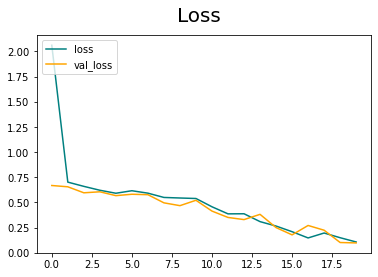

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Visualize Accuracy**

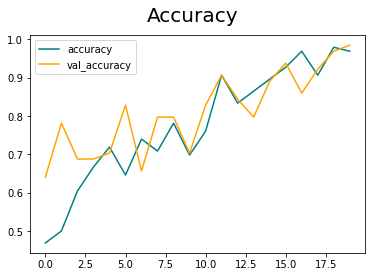

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate Performance

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X) #predict values between 0 and 1
    pre.update_state(y, yhat) #check performance of our test data
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 423ms/step


In [104]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [100]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test Performance

**Happy Person Test**

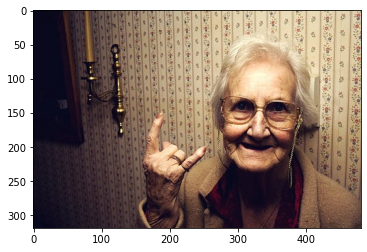

In [111]:
#choose and save a random image from the web and save and read it

img = cv2.imread('happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

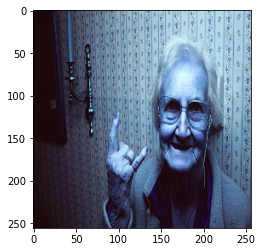

In [112]:
#Resize the image

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 81ms/step


array([[0.14291625]], dtype=float32)

In [114]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


**Sad Person Test**

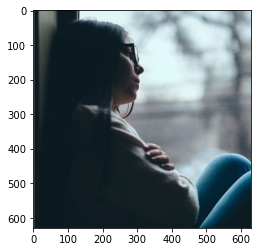

In [117]:
#choose and save a random image from the web and save and read it

img_sad = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img_sad, cv2.COLOR_BGR2RGB))
plt.show()

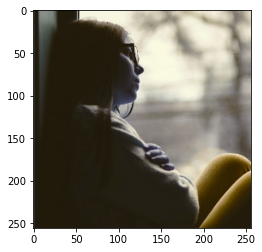

In [118]:
#Resize the image

resize_sad = tf.image.resize(img_sad, (256,256))
plt.imshow(resize_sad.numpy().astype(int))
plt.show()

In [121]:
yhat_sad = model.predict(np.expand_dims(resize_sad/255, 0))
print(yhat_sad)
print()

if yhat_sad > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 98ms/step
[[0.62402254]]

Predicted class is Sad


# 11. Save the Model

In [126]:
from tensorflow.keras.models import load_model

In [129]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.save(os.path.join('models','ImageSentimentAnalyzerModel.h5'))  #creates a HDF5 file

#saving it as a h5(serialization file format) model, we serialize it.
#'models' is a folder we created in our directory to save our model

In [ ]:
new_model = load_model('ImageSentimentAnalyzerModel.h5')

In [ ]:
yhatnew= new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

**Environment activation and libraries installed for Tensorflow in Anaconda environment**

(base) C:\WINDOWS\system32>cd..

(base) C:\Windows>cd..

(base) C:\>cd Users

(base) C:\Users>cd abhijit

(base) C:\Users\abhijit>cd 1PGP2002

(base) C:\Users\abhijit\1PGP2002>cd DeepLearning

(base) C:\Users\abhijit\1PGP2002\DeepLearning>conda create -n deep_learning anaconda python=3.7.9

Proceed ([y]/n)? y




 To activate this environment, use

     $ conda activate deep_learning
#
# To deactivate an active environment, use
#
#     $ conda deactivate



(base) C:\Users\abhijit\1PGP2002\DeepLearning>conda activate deep_learning

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>conda install tensorflow

Proceed ([y]/n)? y

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>conda install pip
Collecting package metadata (current_repodata.json): done
Solving environment: done

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>jupyter notebook





#################### jupyter notebook did not load because of markupsafe, so



(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>pip uninstall markupsafe
Found existing installation: MarkupSafe 2.1.1
Uninstalling MarkupSafe-2.1.1:
  Would remove:
    c:\users\abhijit\appdata\roaming\python\python37\site-packages\markupsafe-2.1.1.dist-info\*
    c:\users\abhijit\appdata\roaming\python\python37\site-packages\markupsafe\*
Proceed (y/n)? y
  Successfully uninstalled MarkupSafe-2.1.1




(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>jupyter notebook


















*****************************************************************

ANACONDA PROMPTS


(base) C:\WINDOWS\system32>cd..

(base) C:\Windows>cd..

(base) C:\>cd Users

(base) C:\Users>cd Abhijit

(base) C:\Users\abhijit>cd 1PGP2002

(base) C:\Users\abhijit\1PGP2002>cd DeepLearning

(base) C:\Users\abhijit\1PGP2002\DeepLearning>conda activate deep_learning

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>pip install <package>
The syntax of the command is incorrect.

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>pip install opencv-python

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\abhijit\\anaconda3\\envs\\deep_learning\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

(deep_learning) C:\Users\abhijit\1PGP2002\DeepLearning>pip install tf-nightly --user
Collecting tf-nightly

